<a href="https://colab.research.google.com/github/Seungwon-hub/ESAA/blob/main/ESAA_YB_Week9_2_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 개념

- **pandas.crosstab()**: 두 개 이상의 범주형 변수 간의 교차 빈도표를 만들어주는 함수
- **pandas.qcut()**: continuous value를 ordinal value로 바꿔주는 함수

# Part1: Exploratory Data Analysis (EDA)

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [115]:
data = pd.read_csv("titanic_train.csv")

In [116]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [117]:
data.isnull().sum() # checking for total null values

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


- The Age, Cabin and Embarked have null values. I will try to fix them.

## How many survived?

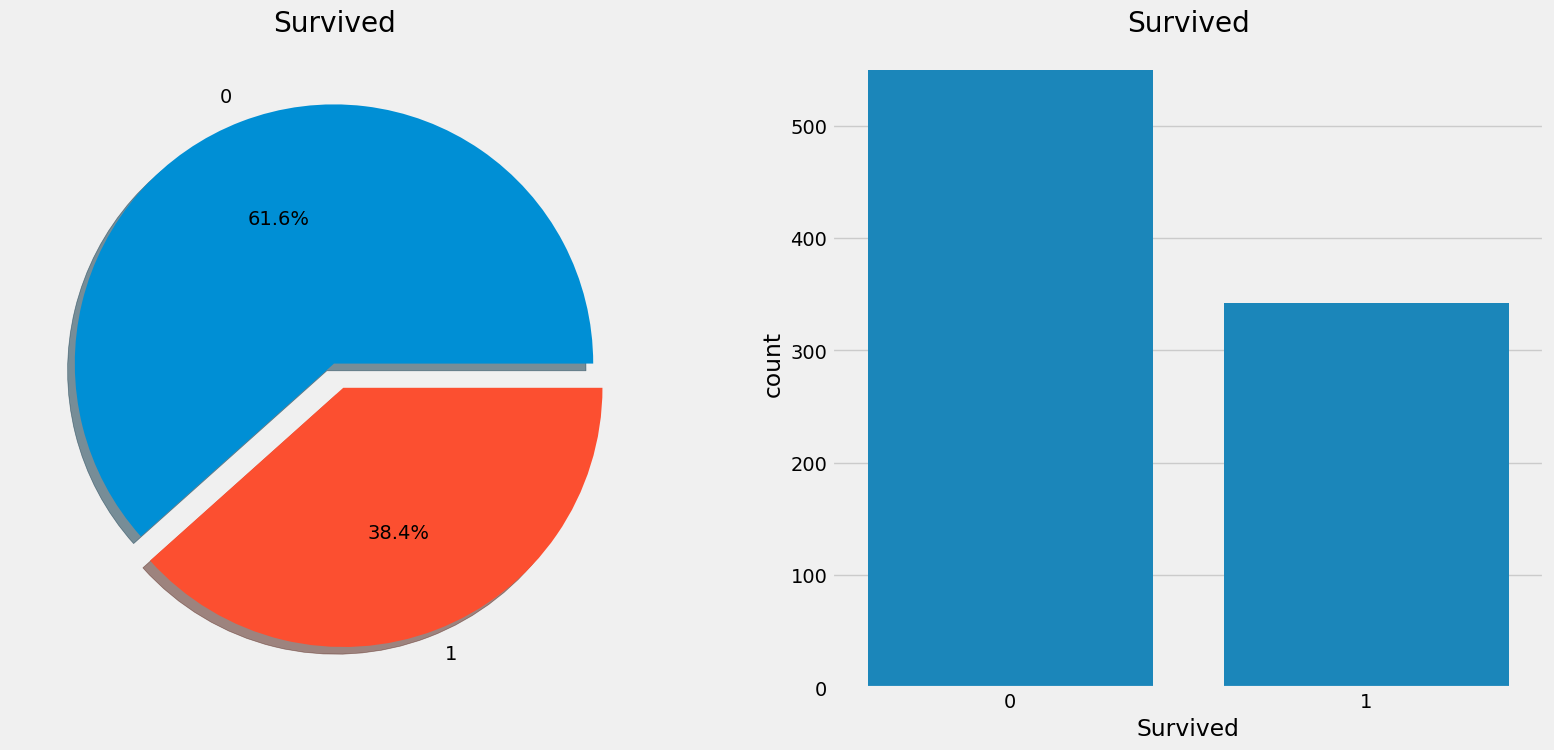

In [118]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

- explode = [0,0.1]: 두 번째 조각을 바깥으로 0.1만큼 띄워 강조
- autopct='%1.1f%%': 각 조각에 백분율 소수점 1자리까지 표시
- shadow=True: 더욱 입체감있는 그래픽

It is evident that not many passengers survived the accident. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

We will try to check the survival rate by using the different features of the dataset.

## Types of Features

1. Categorical Feature
2. Ordinal Feature
3. Continuous Feature

## Analysing The Features



### < Sex --> Categorical Feature >

In [119]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

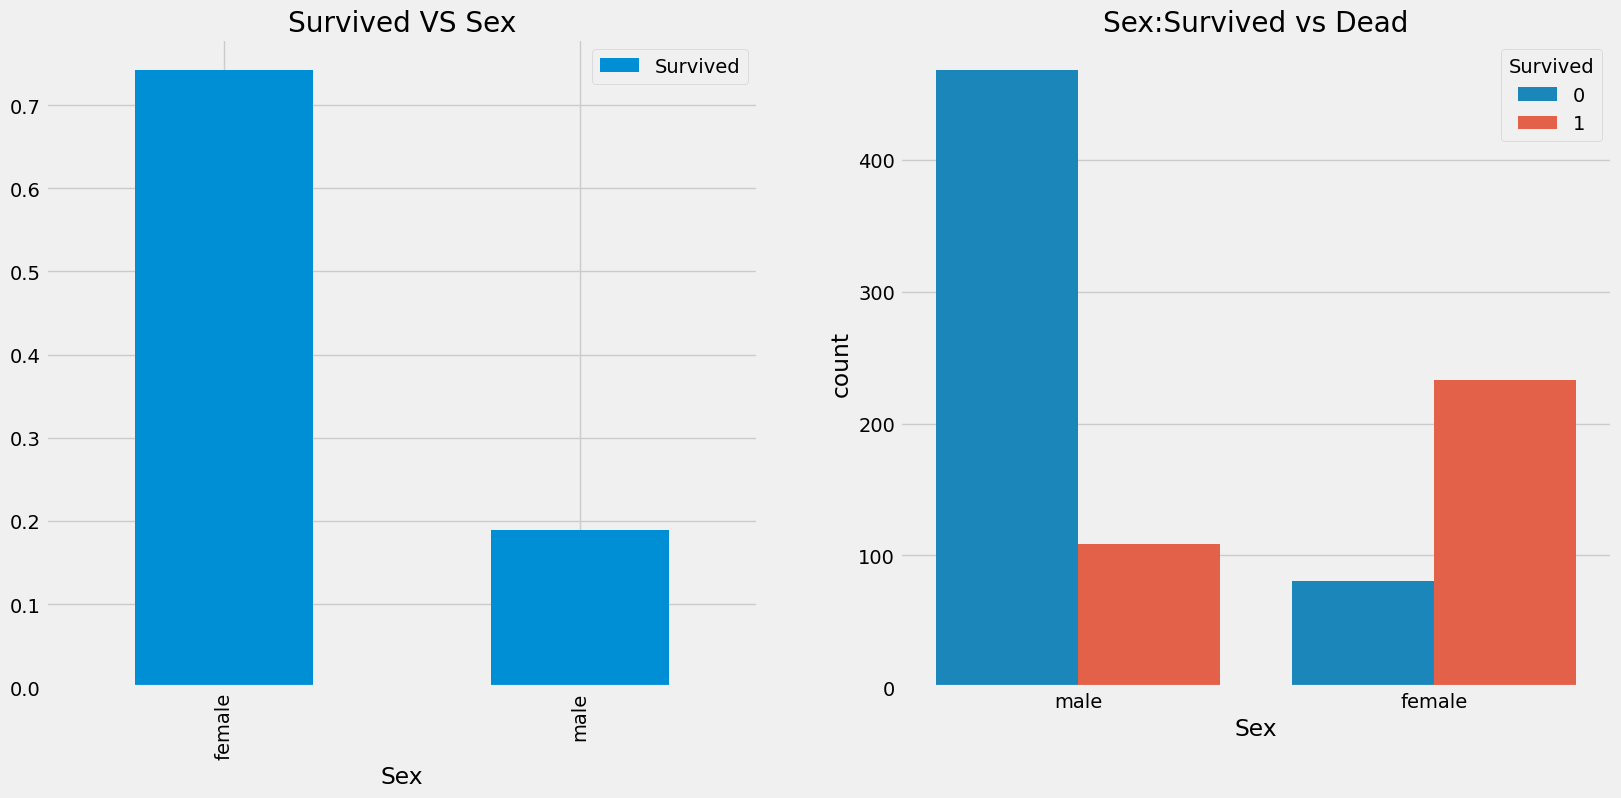

In [120]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived VS Sex')

sns.countplot(x='Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved.

This looks to be a very important feature for modeling.

### < PClass --> Ordinal Feature >

In [121]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


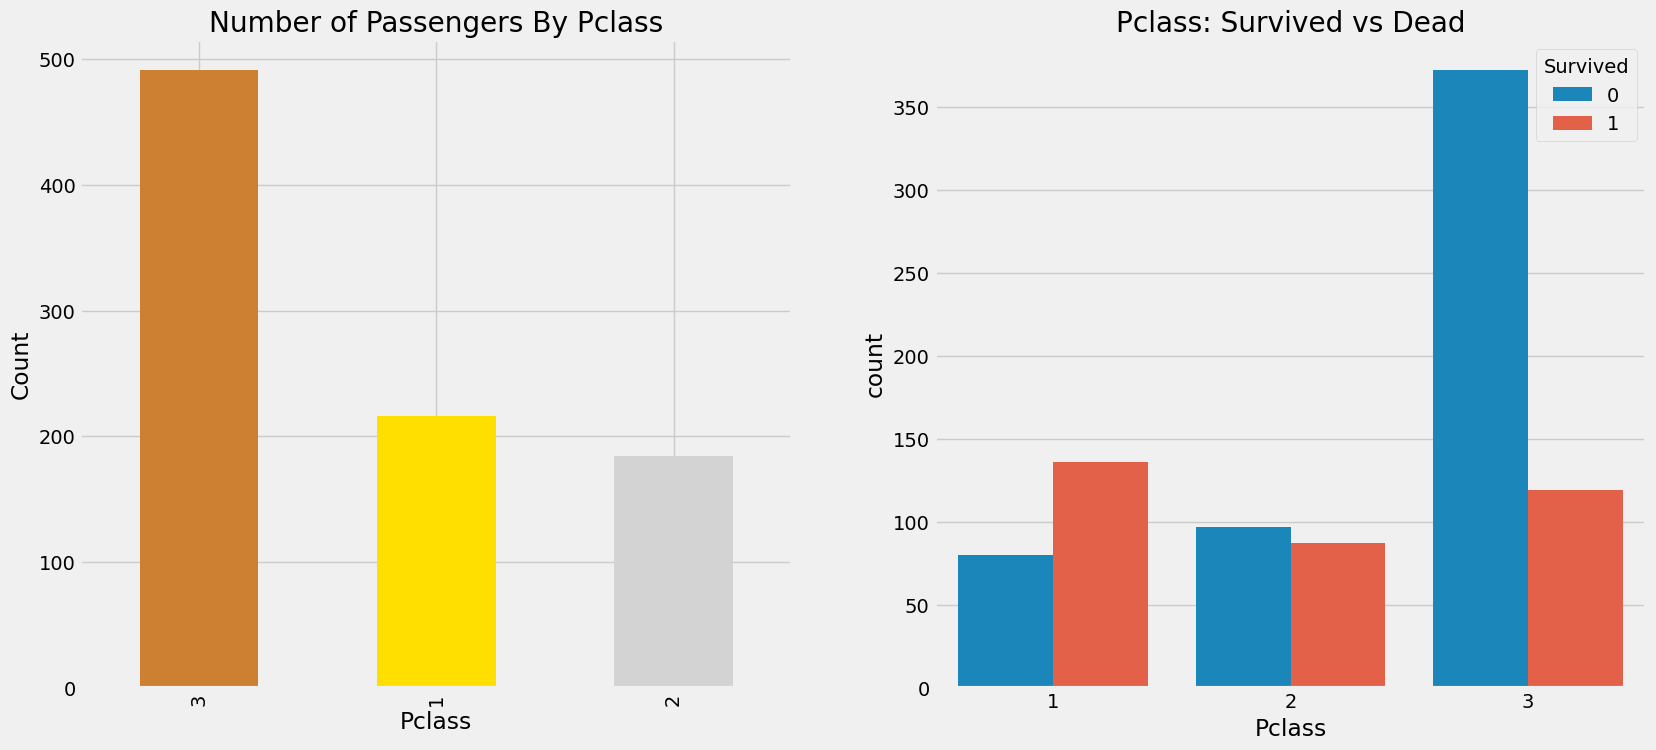

In [122]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

We can clearly see that Passengers of Pclass 1 were given a very high priority while rescue. Even though the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low.

In [123]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

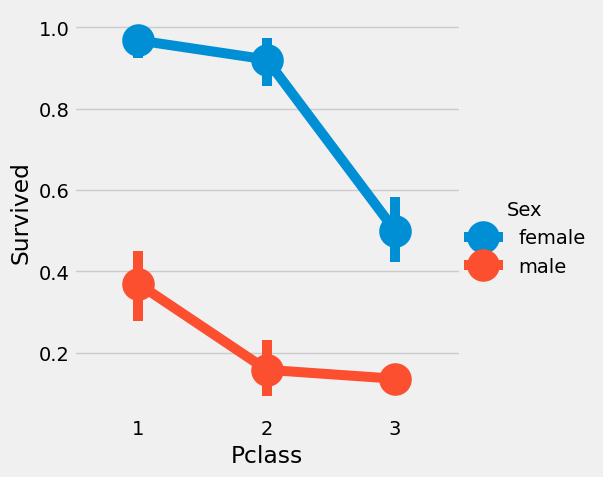

In [124]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='point')
plt.show()

We can easily infer that survival for women from Pclass1 is about 95-96%. It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.


### < Age --> Continuous Feature >

In [125]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


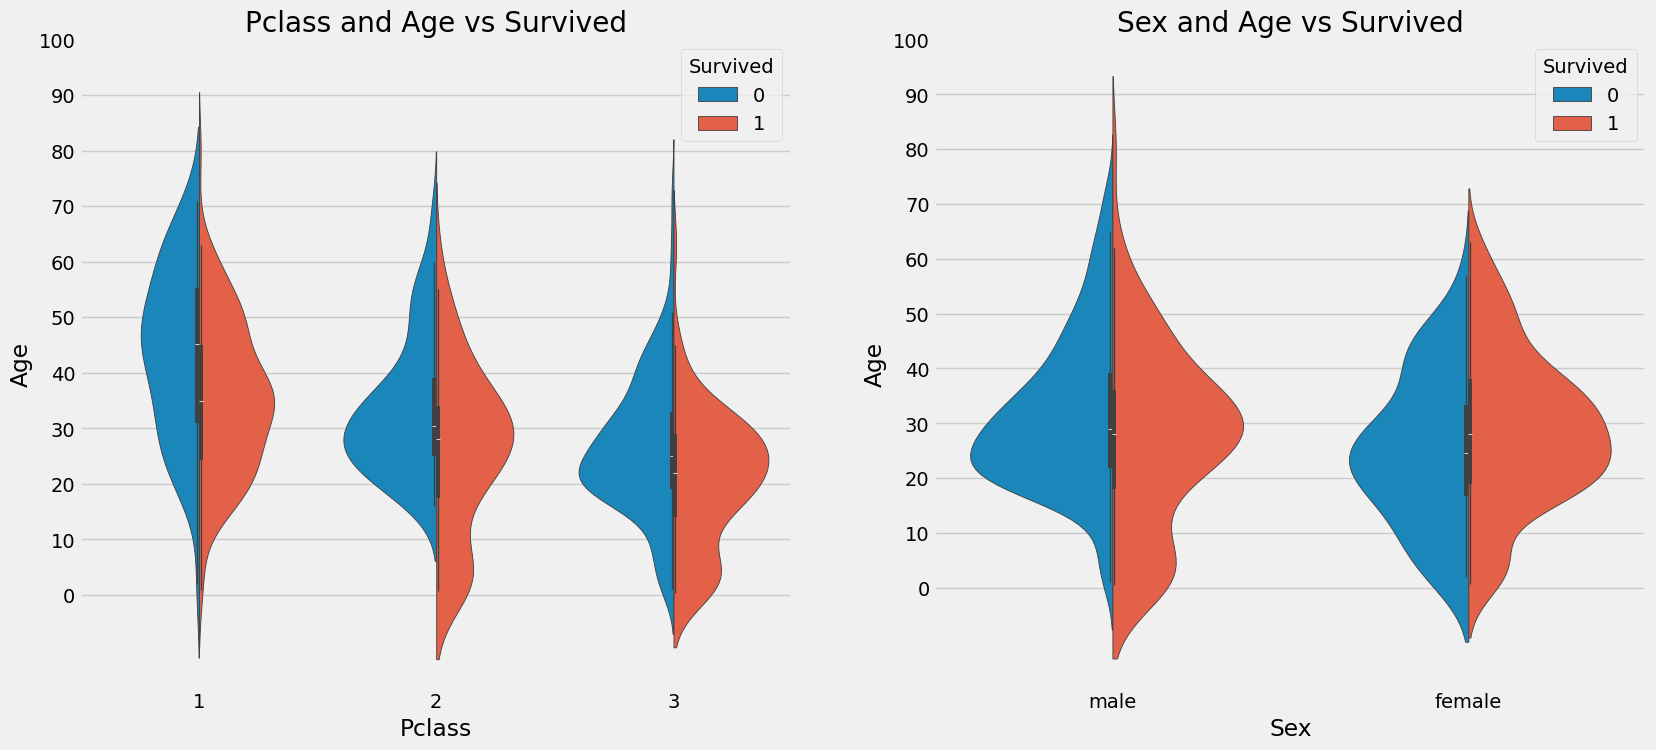

In [126]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110,10))

sns.violinplot(x="Sex", y="Age", hue="Survived", data = data, split=True, ax=ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0,110,10))
plt.show()

< Observations >

1. The number of children increases with Pclass and the survival rate for passengers below Age 10 looks to be good irrespective of the Pclass.

2. Survival chances for Passengers aged 20-50 from Pclass1 is high and is even better for Women.

3. For males, the survival chances decrease with an increase in age.

In [127]:
# Mr., Mrs., Miss. 추출
data['Initial']=0
for i in data:
  data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [128]:
# Checking the Initials with the Sex
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


There are some misspelled initials like Mlle, Mme that stand for Miss.

In [129]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev',
                         'Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other',
                                              'Other', 'Mr','Mr','Mr'], inplace=True)

In [130]:
# Lets check the average age by Initials
data.groupby('Initial')['Age'].mean()

,Age
Initial,
Master,4.574167
Miss,21.860000
Mr,32.739609
Mrs,35.981818
Other,45.888889


### Filling NaN Ages

In [131]:
# Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [132]:
data.Age.isnull().any()
# So no null values left finally

np.False_

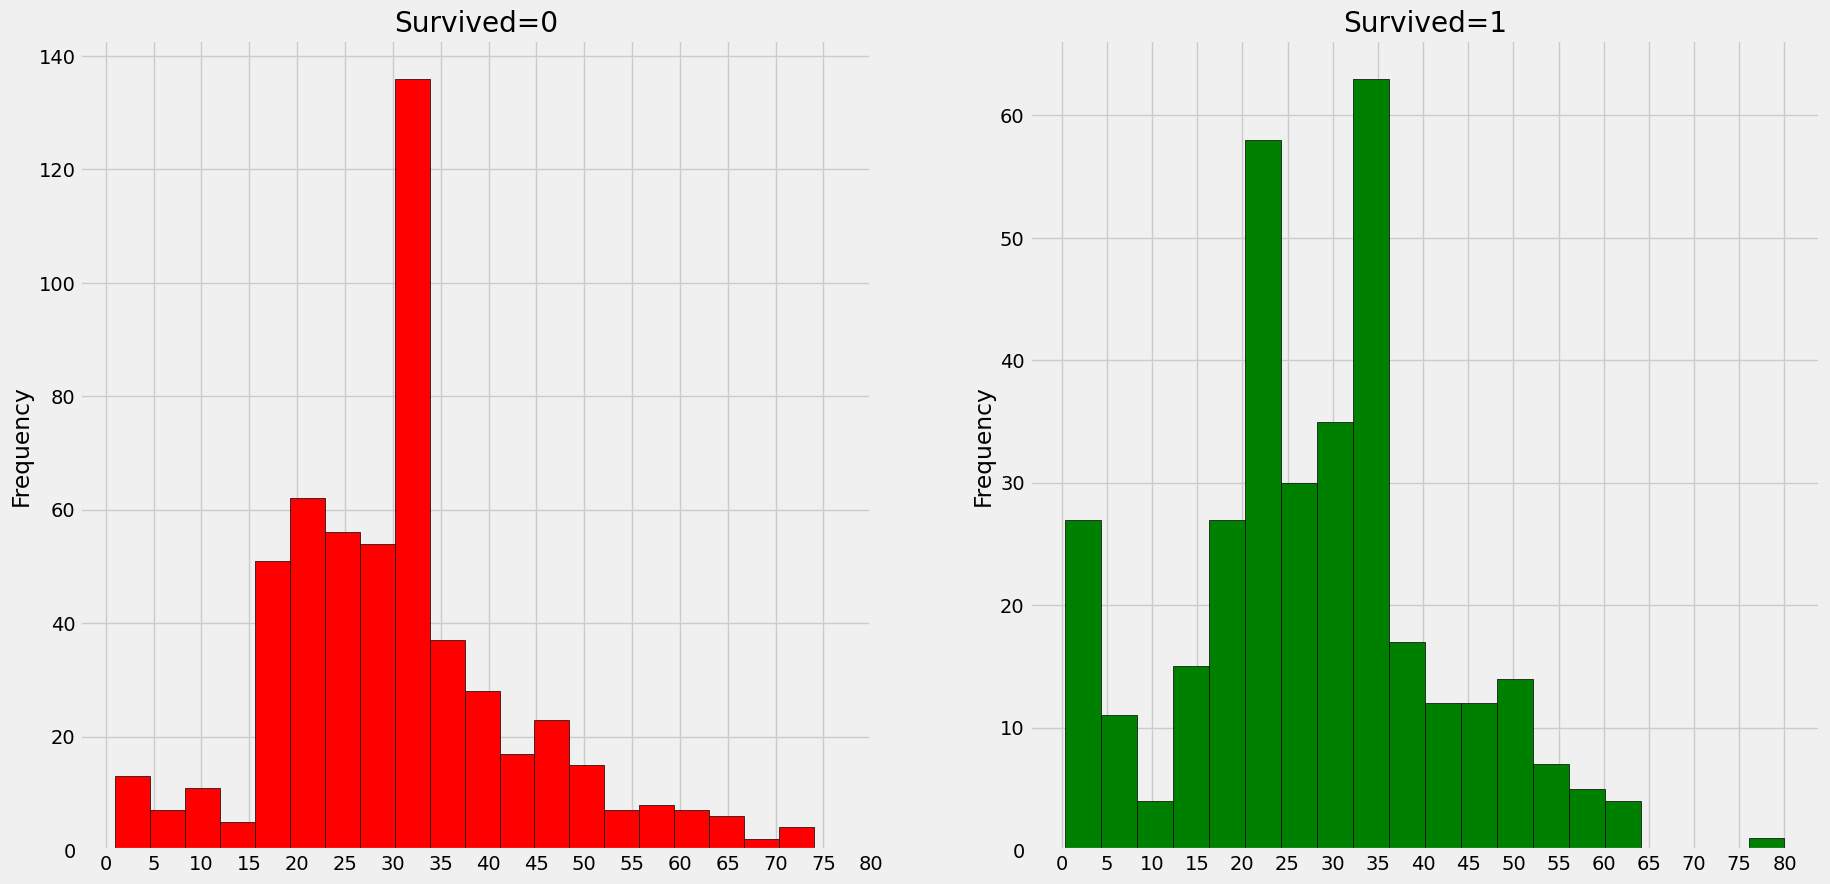

In [133]:
f, ax = plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived=0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)

data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_title('Survived=1')
x2 = list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

< Observation >
1. The Toddlers were saved in large numbers.

2. The oldest passenger was saved.

3. Maximum number of deaths were in the age group of 30-40.

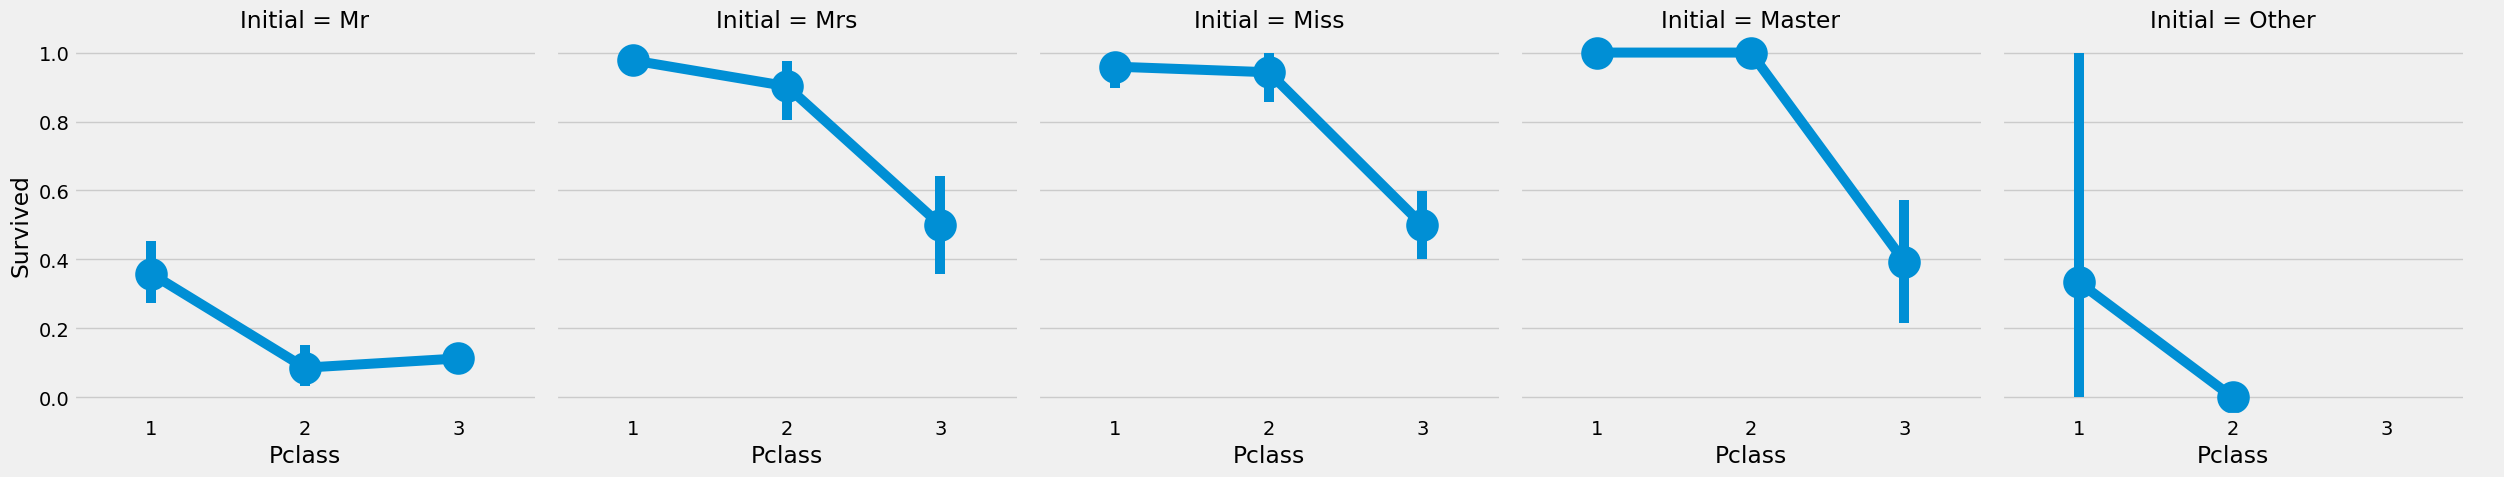

In [134]:
sns.catplot(x='Pclass', y='Survived', col='Initial', data=data, kind='point')
plt.show()

The Women and Chile first policy thus holds true irrespective of the class.

### < Embarked --> Categorical Value >

- Embarked 변수: 탑승한 항구
- C:	Cherbourg	셰르부르 (프랑스)
- Q:	Queenstown	퀸스타운 (아일랜드)
- S:	Southampton	사우샘프턴 (영국)

In [135]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

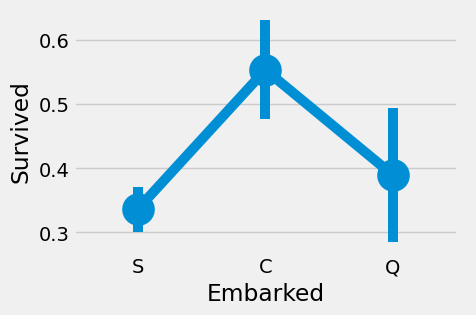

In [136]:
sns.catplot(x='Embarked', y='Survived', data=data, kind='point')
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

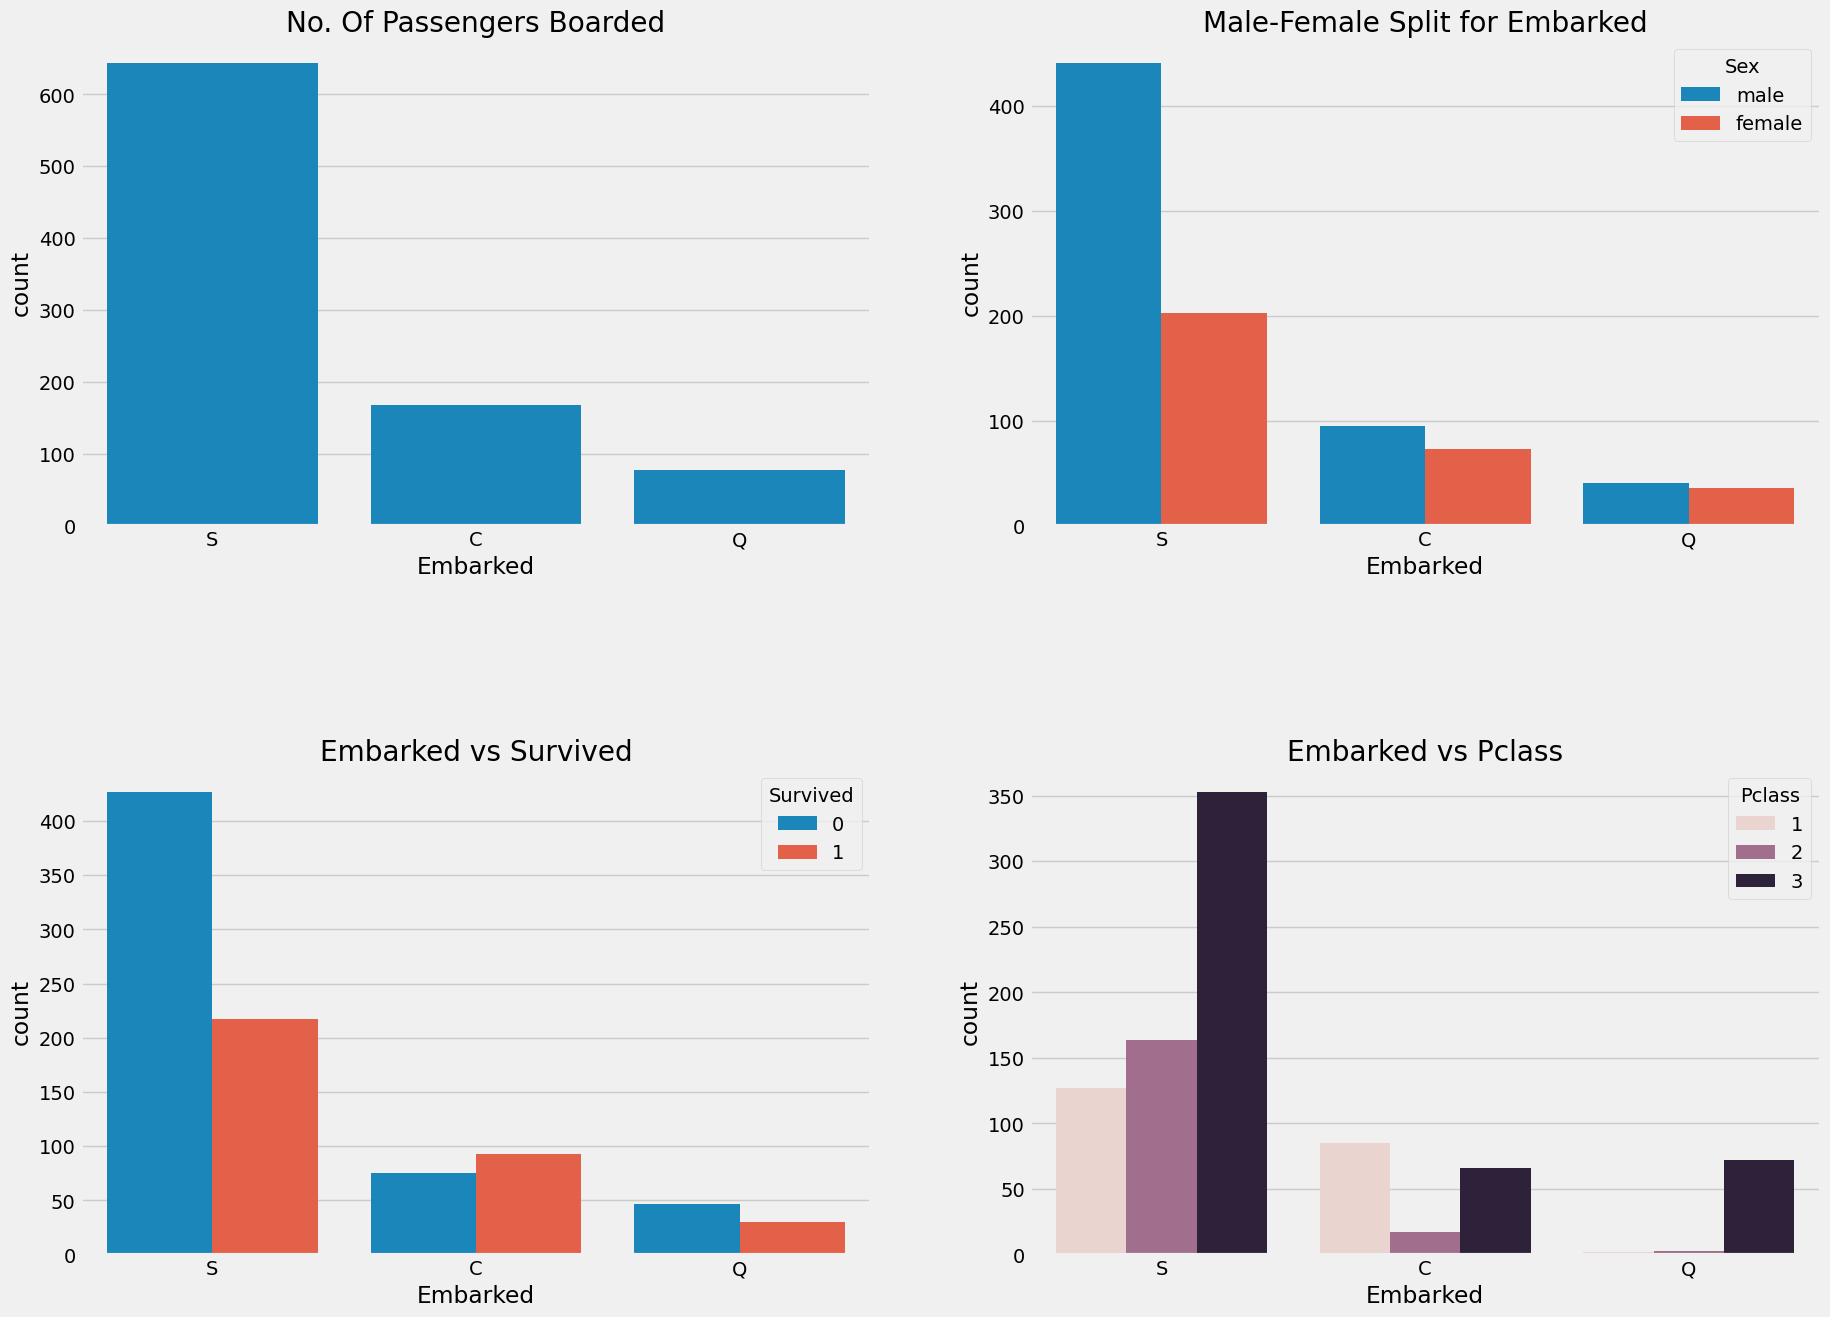

In [137]:
f, ax = plt.subplots(2,2,figsize=(20,15))

sns.countplot(x='Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot(x='Embarked', hue='Sex',data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot(x='Embarked', hue = 'Survived',data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot(x='Embarked', hue='Pclass',data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

< Observations >
1. Maximum passengers boarded from S. Majority of them being from Pclass3.

2. The passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass1 and Pclass2 passengers.

3. The Embark S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from Pclass3 around 81% didn't survive.

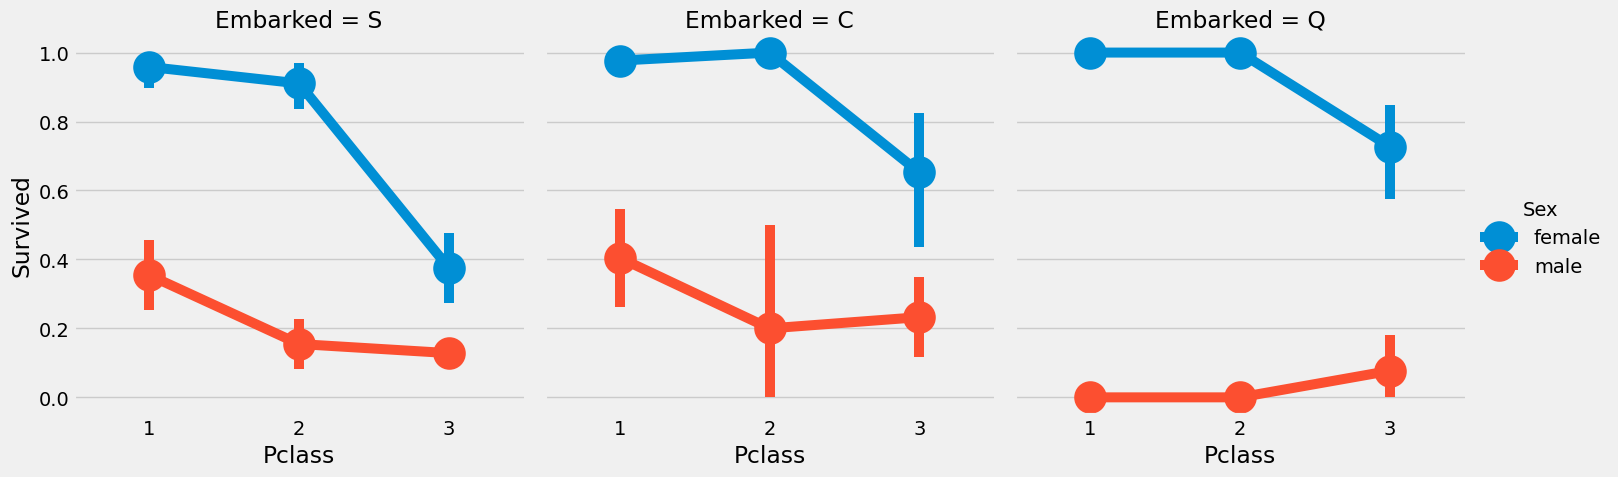

In [138]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=data, kind='point')
plt.show()

### Filling Embarked NaN

- As we saw that maximum passengers boarded from Port S, we replace NaN with S.

In [139]:
data['Embarked'].fillna('S', inplace=True)

In [140]:
data.Embarked.isnull().any()
# Finally No NaN values

np.False_

### < SibSp --> Discrete Feature >

- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife

In [141]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


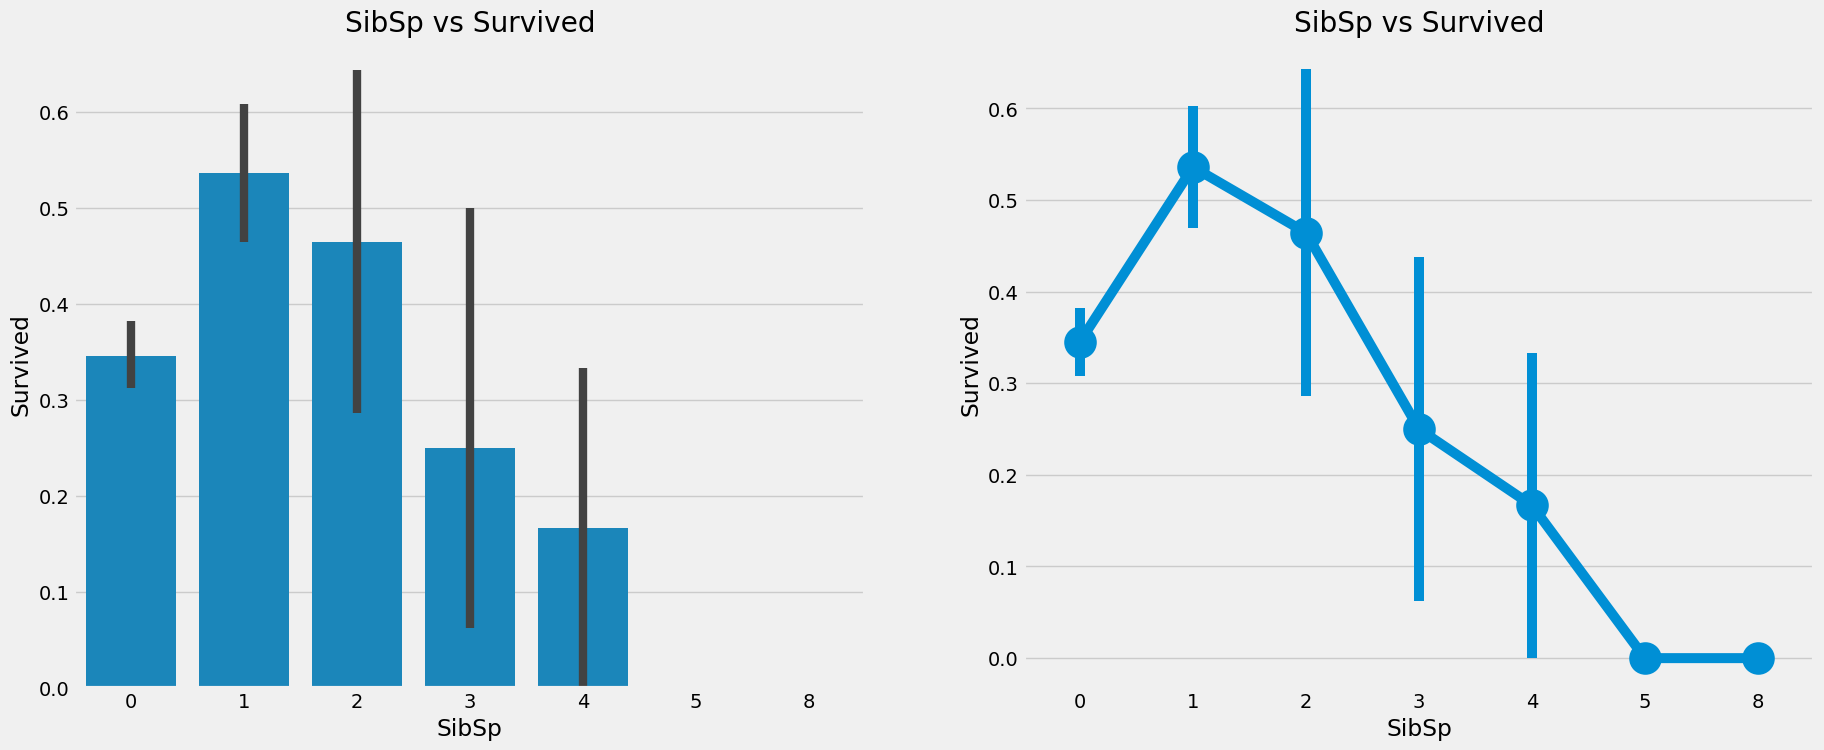

In [142]:
f, ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='SibSp', y='Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.pointplot(x='SibSp', y='Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [143]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


< Observations >

The barplot and factorplot shows that if a passenger is alone onboard with no siblings, he have 34.5% survival rate.

The graph roughly decreases if the number of siblings increase. This makes sense. That is, if I have a family on board, I will try to save them instead of saving myself first. Surprisingly the survival for families with 5-8 members is 0%.

### Parch

- 함께 탑승한 부모(Parent) 또는 자녀(Children)의 수

In [144]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


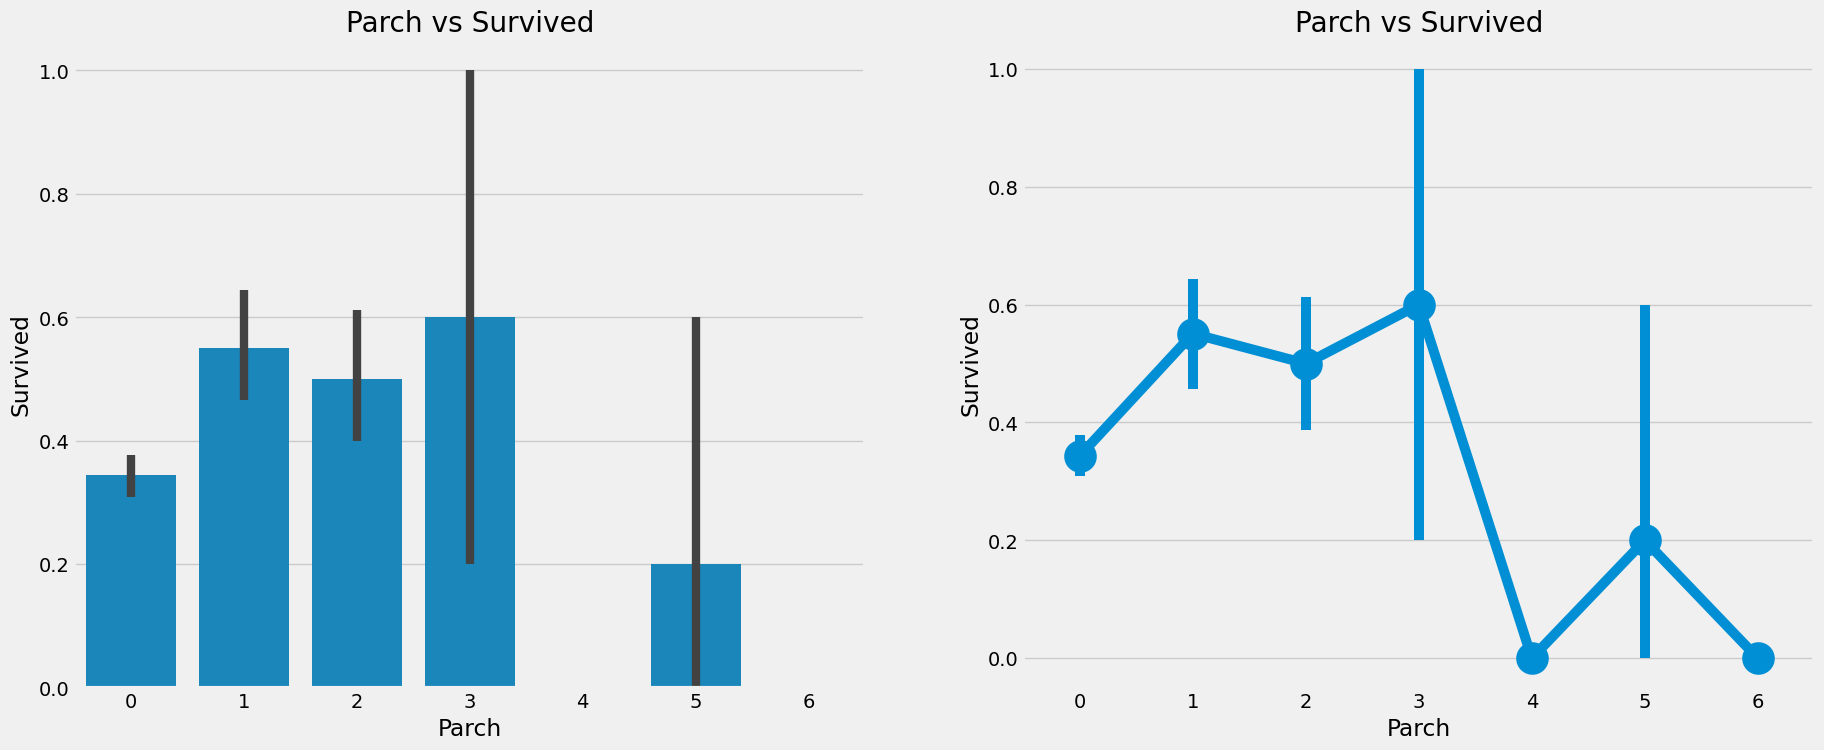

In [145]:
f, ax = plt.subplots(1,2,figsize=(20,8))

sns.barplot(x='Parch', y='Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.pointplot(x='Parch', y='Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')

plt.close(2)
plt.show()

< Observations >

Here too the results are quite similar. Passengers with their parents onboard have greater chance of survival. It however reduces as the number goes up.

The chances of survival is good for somebody who has 1-3 parents on the ship. Being alone also proves to be fatal and the chances for survival decreases when somebody has >4 parents on the ship.

### < Fare --> Continuous Feature >

In [146]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


Text(0.5, 1.0, 'Fares in Pclass 3')

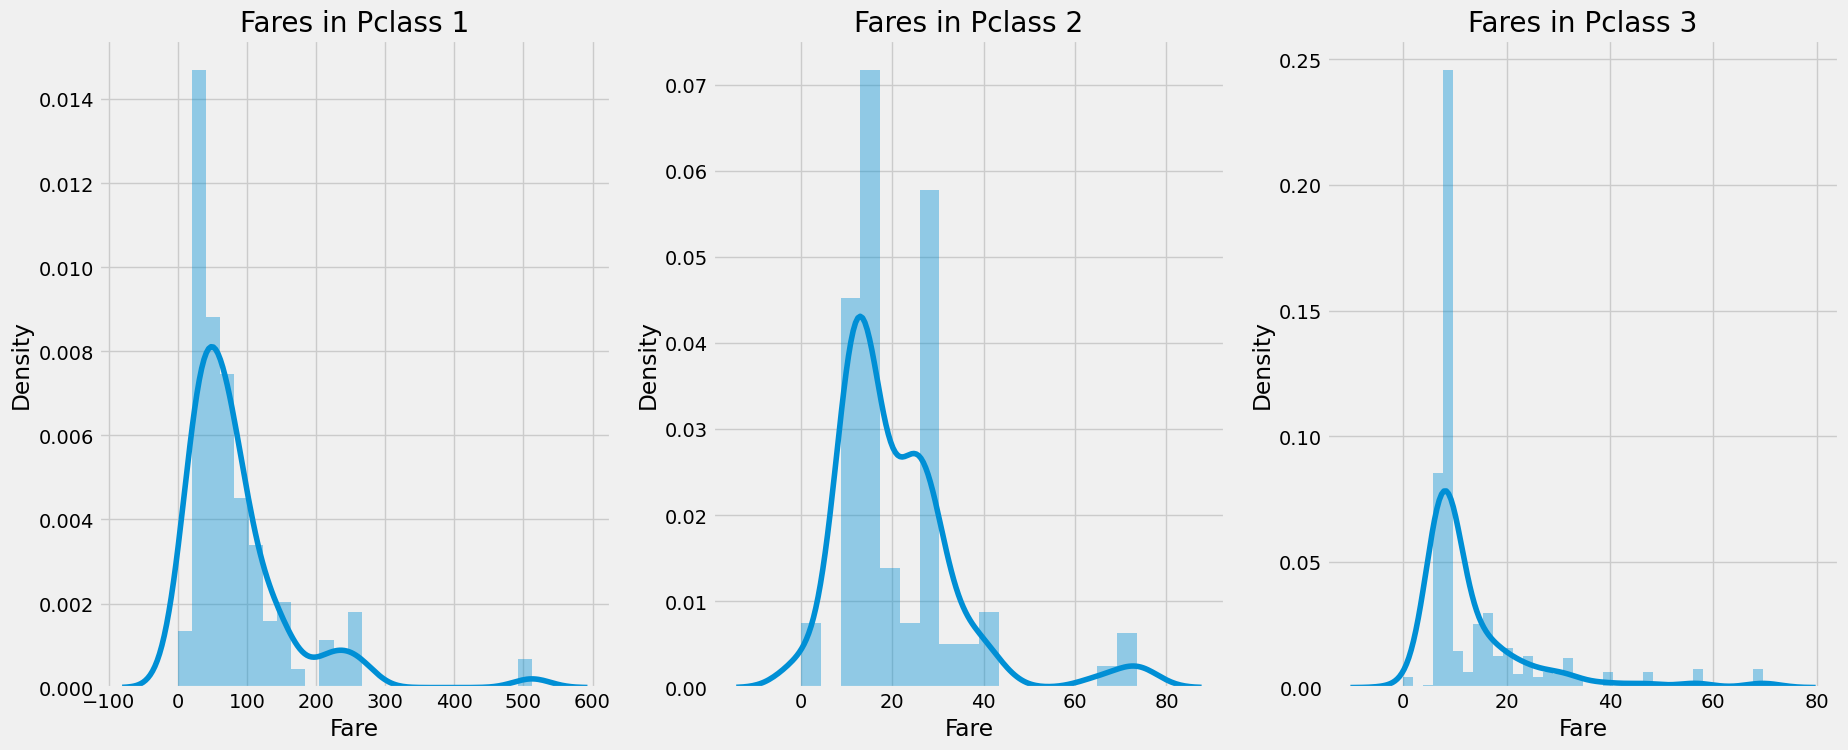

In [147]:
f, ax = plt.subplots(1,3,figsize=(20,8))

sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

## Correlation Between The Features

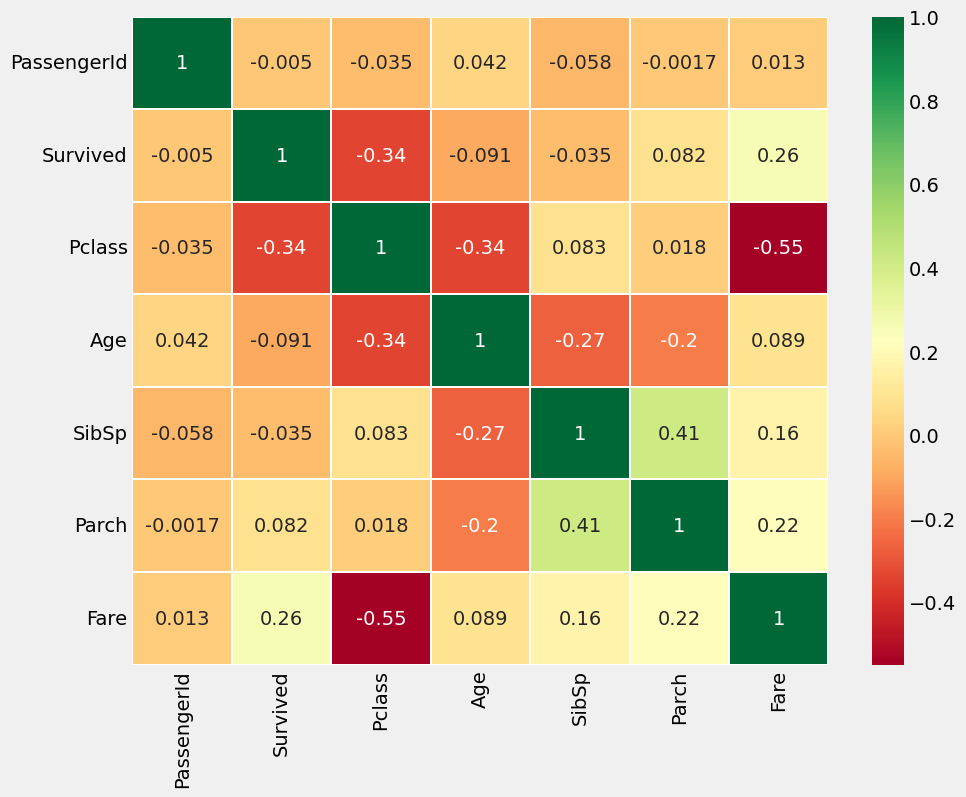

In [148]:
# Select only numerical features for correlation analysis
numerical_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
sns.heatmap(numerical_data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

The highest correlation is between SibSp and Parch i.e 0.41.

# Part2: Feature Engineering and Data Cleaning

Whenever we are given a dataset with features, it is not necessary that all the features will be important.  There maybe be many redundant features which should be eliminated. Also we can get or add new features by observing or extracting information from other features.

## Age_band

In [149]:
data['Age_band']=0
data.loc[data['Age']<=16, 'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32), 'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48), 'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64), 'Age_band']=3
data.loc[data['Age']>64, 'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [150]:
# Checking the number of passengers in each band
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,count
Age_band,
1,382
2,325
0,104
3,69
4,11


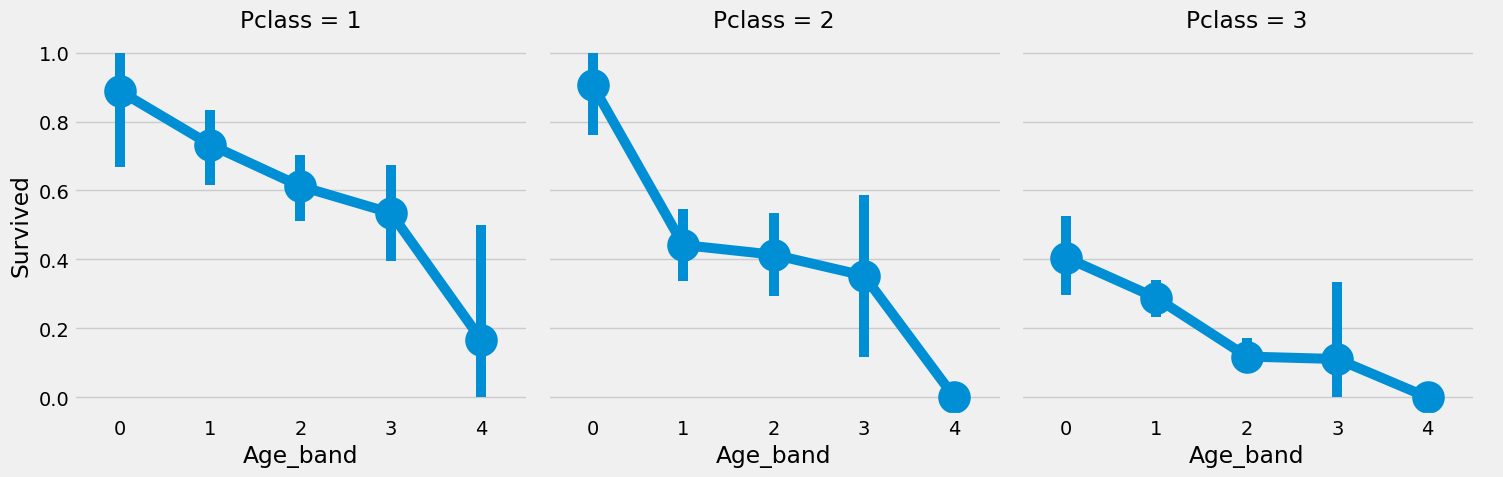

In [151]:
sns.catplot(x='Age_band', y='Survived', data=data, col='Pclass', kind='point')
plt.show()

## Family_Size and Alone

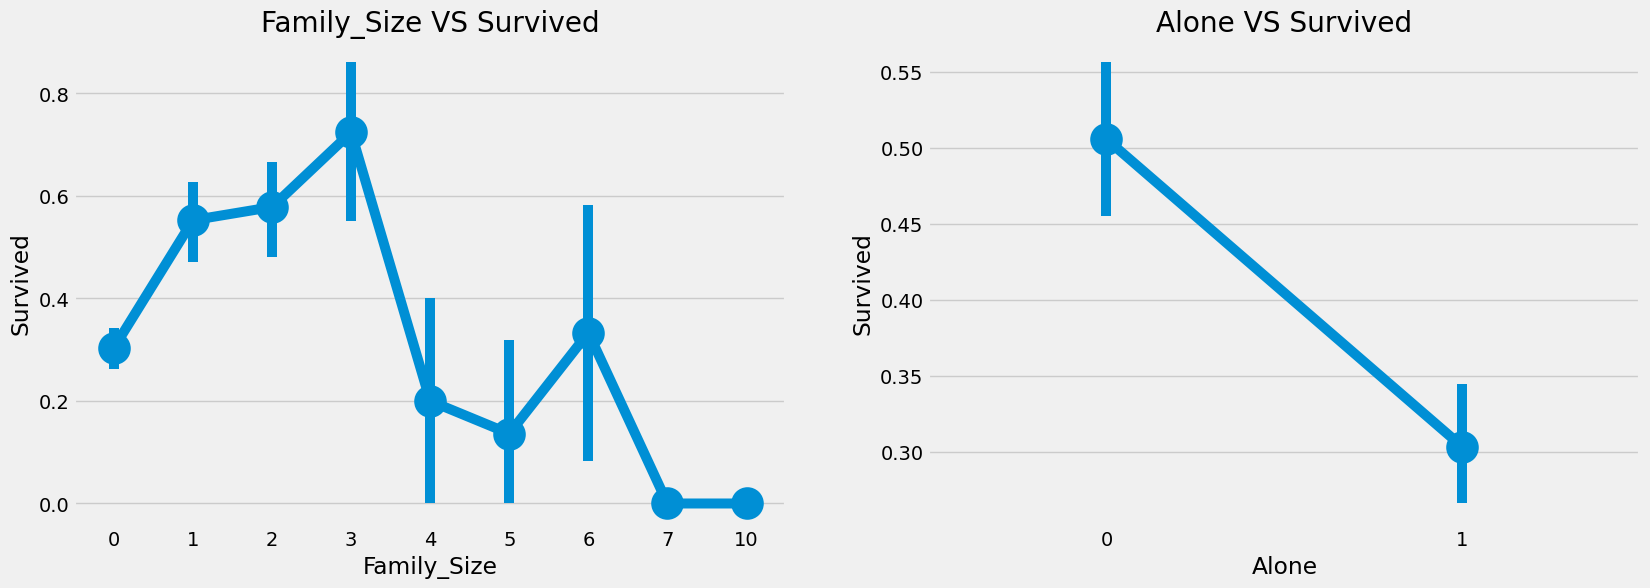

In [152]:
data['Family_Size']=0

# Family Size
data['Family_Size'] = data['Parch'] + data['SibSp']

data['Alone']=0
data.loc[data.Family_Size==0, 'Alone']=1 # Alone

f, ax = plt.subplots(1,2,figsize=(18,6))
sns.pointplot(x='Family_Size', y='Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size VS Survived')

sns.pointplot(x='Alone', y='Survived', data=data, ax=ax[1])
ax[1].set_title('Alone VS Survived')

plt.close(2)
plt.close(3)
plt.show()

 If you are alone or family_size=0,then chances for survival is very low. For family size > 4,the chances decrease too. This also looks to be an important feature for the model.

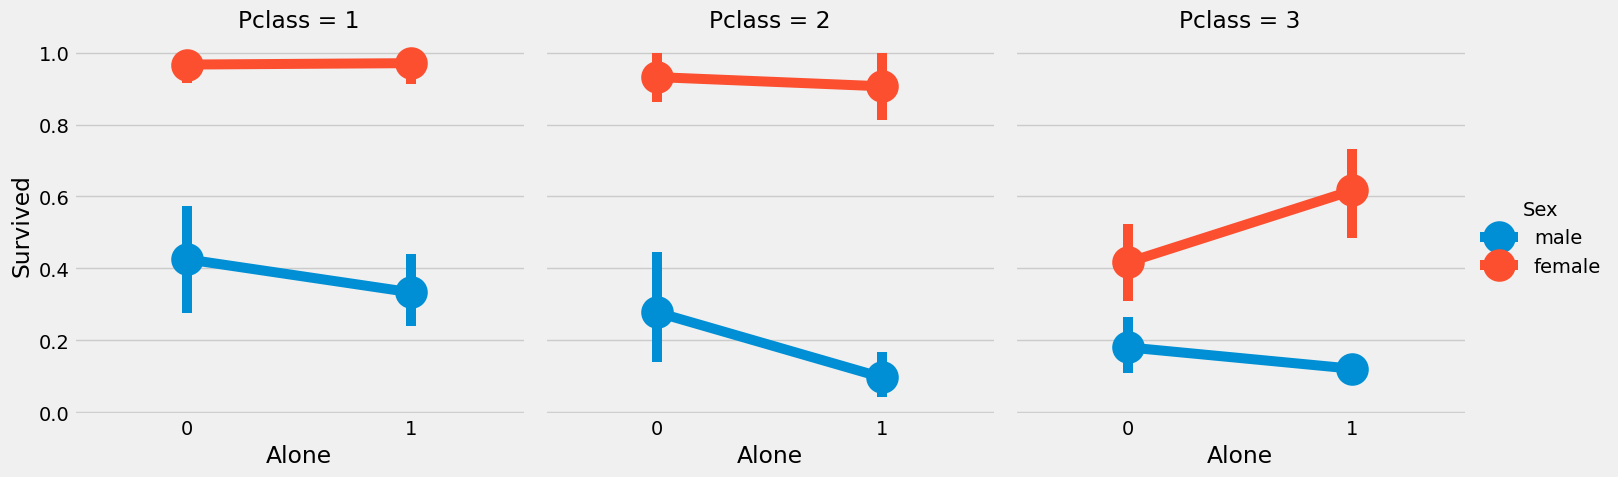

In [153]:
sns.catplot(x='Alone', y='Survived', data=data, hue='Sex', col='Pclass', kind='point')
plt.show()

## Fare_Range

In [154]:
data['Fare_Range'] = pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


Fare_range increases, the chances of survival increases.



In [155]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

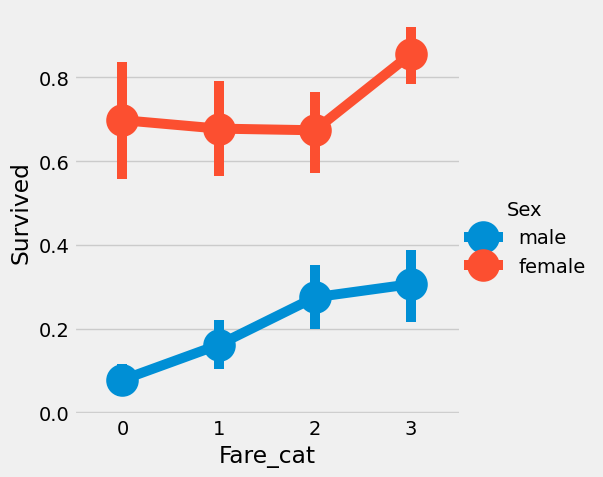

In [156]:
sns.catplot(x='Fare_cat', y='Survived', data=data, hue='Sex', kind='point')
plt.show()

Clearly, as the Fare_cat increases, the survival chances increases. This feature may become an important feature during modeling along with the Sex.

## Converting String Values into Numeric

In [157]:
data['Sex'].replace(['male', 'female'],[0,1], inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2], inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4], inplace=True)

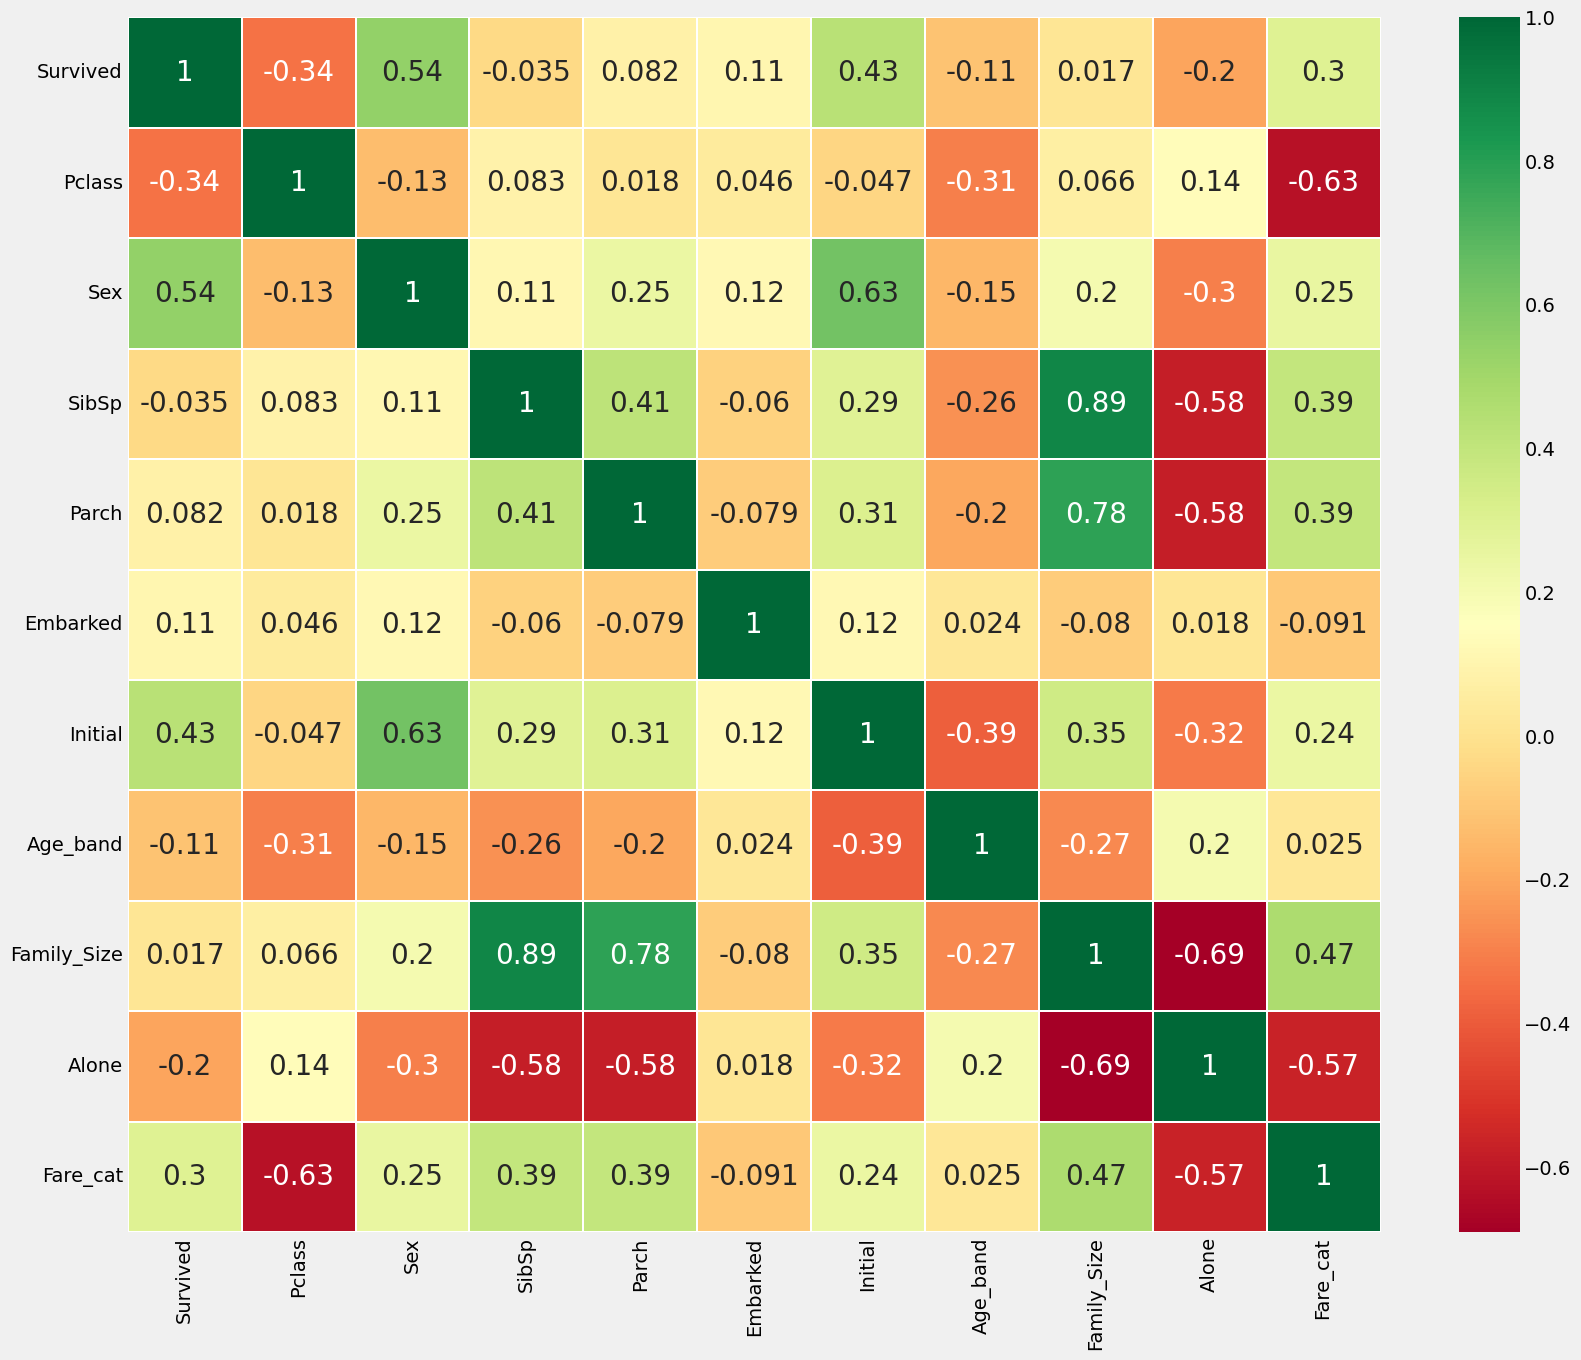

In [158]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'], axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

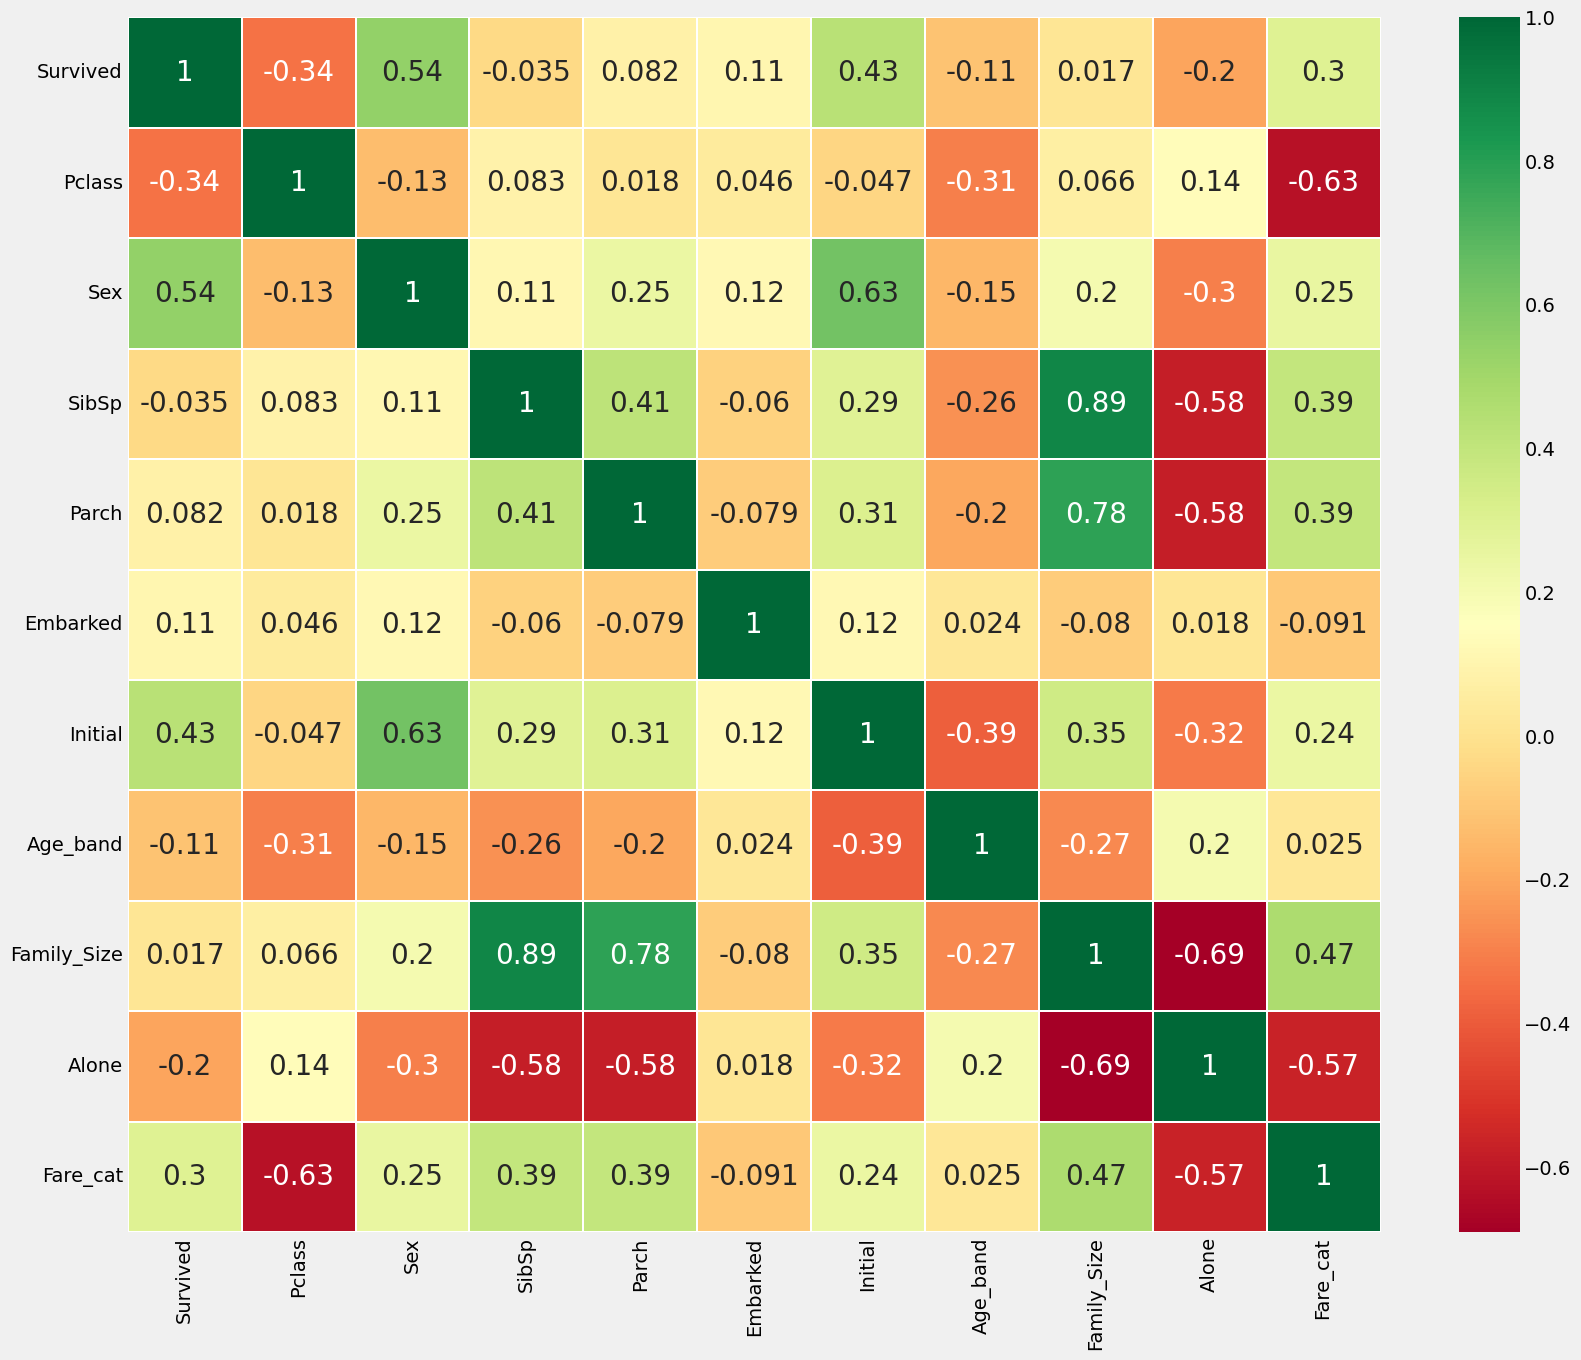

In [159]:
data.drop(columns=['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'], axis=1, inplace=True, errors='ignore')

# Select only numerical features for correlation analysis
numerical_data = data.select_dtypes(include=['number'])

# Your remaining code for the heatmap
sns.heatmap(numerical_data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Part3: Predictive Modeling

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [161]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]

X = data[data.columns[1:]]
Y = data['Survived']

## Radinal Support Vector Machine

In [162]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is  0.835820895522388


## Linear Support Vector Machine

In [163]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is ', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is  0.8171641791044776


## Logistic Regression

In [165]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('Accuracy for Logistic Regression is ', metrics.accuracy_score(prediction3, test_Y))

Accuracy for Logistic Regression is  0.8134328358208955


## Decision Tree

In [166]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('Accuracy for Decision Tree is ', metrics.accuracy_score(prediction4, test_Y))

Accuracy for Decision Tree is  0.8022388059701493


## K-Nearest Neighbors

In [167]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('Accuracy for KNN is ', metrics.accuracy_score(prediction5, test_Y))

Accuracy for KNN is  0.8134328358208955


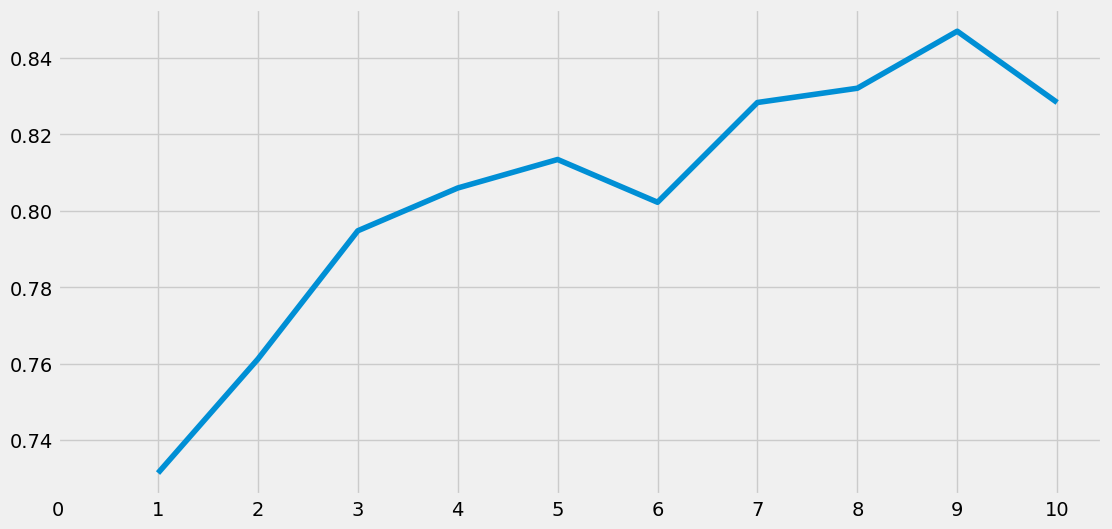

Accuracy for different values of n are: [0.7313432835820896, 0.7611940298507462, 0.7947761194029851, 0.8059701492537313, 0.8134328358208955, 0.8022388059701493, 0.8283582089552238, 0.832089552238806, 0.8470149253731343, 0.8283582089552238] with the max value as  0.8470149253731343


In [172]:
a_index = list(range(1,11))
a = [] # changed from pd.Series() to []
x = [0,1,2,3,4,5,6,7,8,9,10]

for i in list(range(1,11)):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(train_X, train_Y)
  prediction = model.predict(test_X)
  a.append(metrics.accuracy_score(prediction, test_Y)) # Use append on list instead of Series, removed pd.Series()

plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracy for different values of n are:', a, 'with the max value as ', max(a)) # max(a) instead of a.values.max() since a is now a list

## Gaussian Naive Bayes

In [173]:
model=GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('Accuracy for the NaiveBayes is', metrics.accuracy_score(prediction6, test_Y))

Accuracy for the NaiveBayes is 0.8134328358208955


## Random Forests

In [174]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('Accuracy for the Random Forest is', metrics.accuracy_score(prediction7, test_Y))

Accuracy for the Random Forest is 0.8171641791044776


Now this seems to be be very good accuracy for a classifier, but we can't confirm that it will be 90% for all the new test sets that come over. As the training and testing data changes, the accuracy will also change.

To overcome this and get a generalized model, we use **Cross Validation**.

## Cross Validation

In [178]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

kfold = KFold(n_splits=10, shuffle=True, random_state=22)
xyz = []
accuracy = []
std = []
classifiers = ['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models = [svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]

for i in models:
  model = i
  cv_result = cross_val_score(model, X, Y, cv = kfold, scoring = 'accuracy')
  xyz.append(cv_result.mean())
  std.append(cv_result.std())
  accuracy.append(cv_result)

new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz, 'Std':std}, index = classifiers)
new_models_dataframe2


,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.035630
Decision Tree,0.801373,0.044253
Naive Bayes,0.795843,0.054861
Random Forest,0.813733,0.045907


<Axes: >

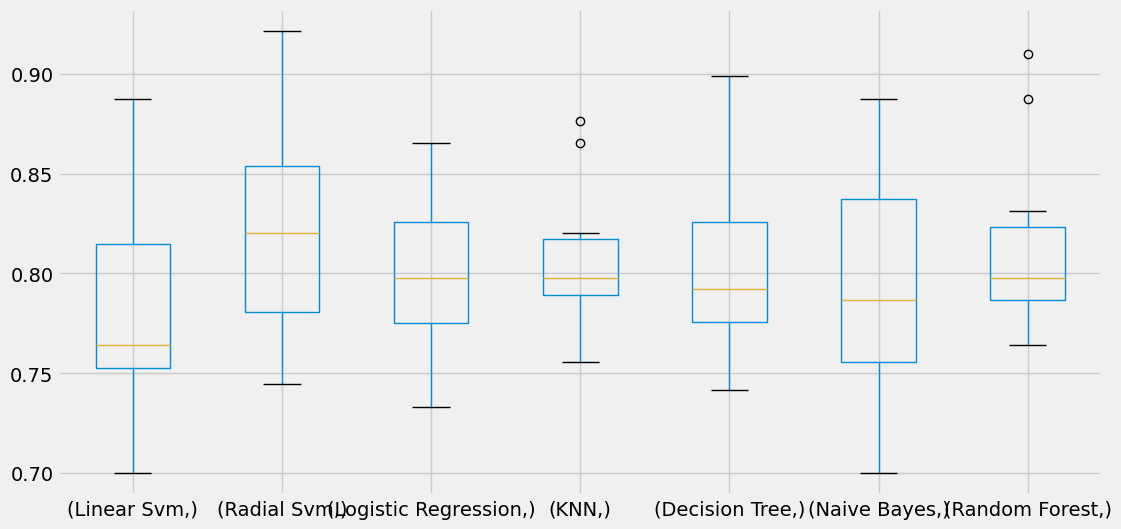

In [179]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

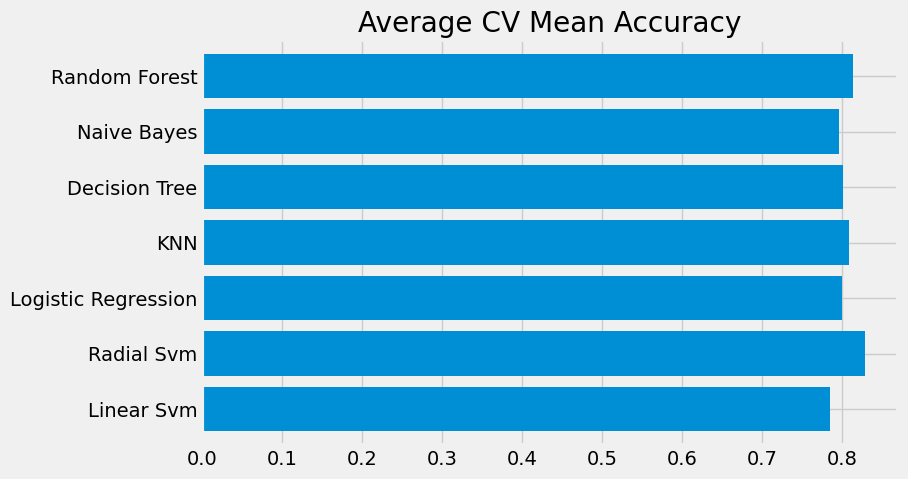

In [180]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

## Confusion Matrix

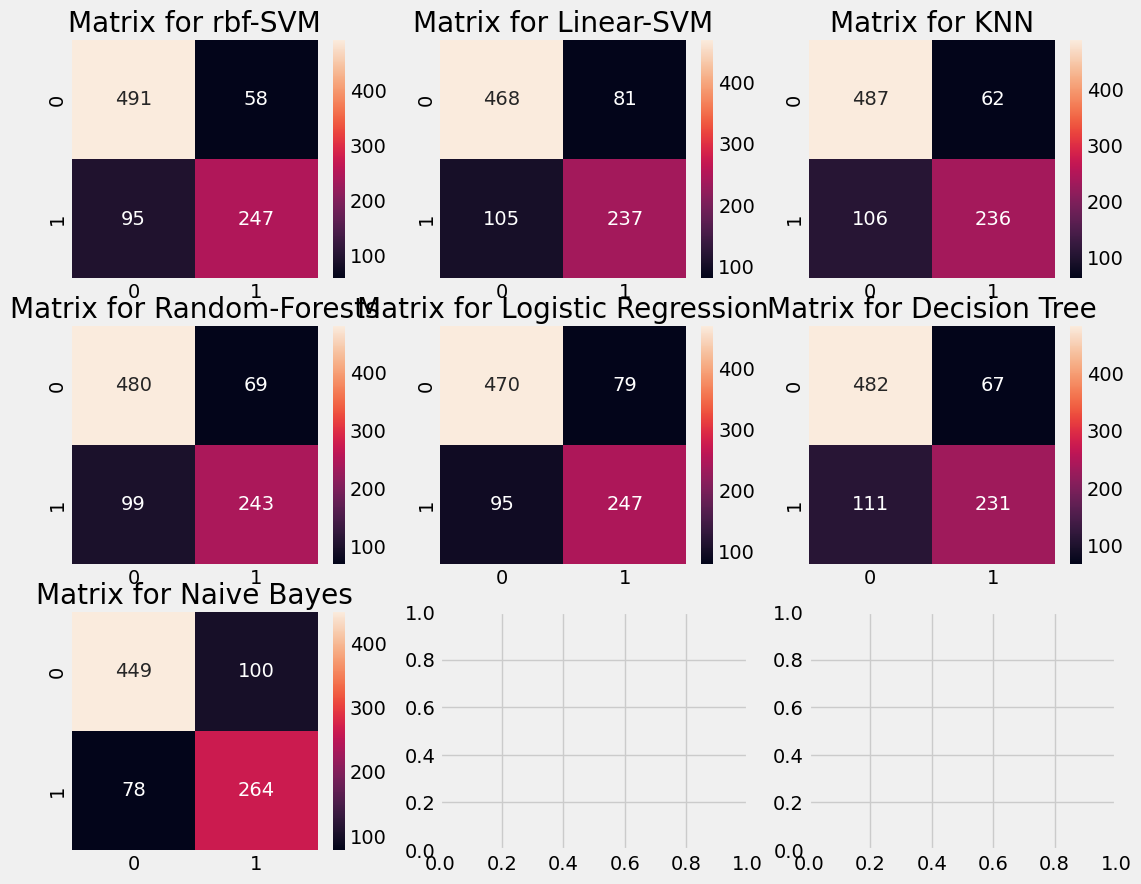

In [189]:
f, ax = plt.subplots(3,3,figsize=(12,10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,0], annot=True, fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,1], annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,2], annot=True, fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,0], annot=True, fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,1], annot=True, fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,2], annot=True, fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[2,0], annot=True, fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

< Interpreting Confusion Matrix >

왼쪽 대각선은 각 클래스에 대해 올바른 예측을 한 횟수를 나타내고 오른쪽 대각선은 잘못된 예측을 한 횟수를 나타냅니다. rbf-SVM의 첫 번째 그래프를 고려해 보겠습니다:

1. 정확한 예측의 수는 491(사망) + 247(생존)이며, 평균 CV 정확도는 (491+247)/891 = 82.8%로 이전에 얻었습니다.

2. 오류 --> 58명의 사망자를 생존자로 잘못 분류하고 95명을 생존자로 분류했습니다. 따라서 사망자를 생존자로 예측하여 더 많은 실수를 저질렀습니다.

모든 행렬을 보면 rbf-SVM이 죽은 승객을 정확하게 예측할 확률이 더 높지만, 나이브베이즈는 살아남은 승객을 정확하게 예측할 확률이 더 높다고 말할 수 있습니다.

## Hyper-Parameters Tuning


### SVM

In [191]:
from sklearn.model_selection import GridSearchCV

C = [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel = ['rbf', 'linear']
hyper = {'kernel':kernel, 'C':C, 'gamma':gamma}
gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


### Random Forests

In [196]:
n_estimators = range(100,1000,100)
hyper = {'n_estimators':n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


The best score for RBF-SVM is 82.82% with C=0.4, gamma=0.3. For RandomForest score is about 81.93% with n_estimators = 300

## Ensembling
Ensembling is a good way to increase the accuracy or performance of a model. In simple words, it is the combination of various simple models to create a single powerful model.

### Voting Classifier

In [197]:
from sklearn.ensemble import VotingClassifier

ensemble_lin_rbf = VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))], voting='soft').fit(train_X, train_Y)

print('Accuracy for ensemble model is:', ensemble_lin_rbf.score(test_X, test_Y))
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv=10, scoring='accuracy')
print('The cross validated score is', cross.mean())

Accuracy for ensemble model is: 0.8208955223880597
The cross validated score is 0.8249188514357053


### Bagging KNN

In [199]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is:', metrics.accuracy_score(prediction, test_Y))

result = cross_val_score(model, X, Y, cv = 10, scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8104244694132333


### Bagged DecisionTree

In [200]:
model = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


## Boosting
Boosting is an ensembling technique which uses sequential learning of classifiers. It is a step by step enhancement of a weak model.

### AdaBoost

The weak learner or estimator in this case is a Decsion Tree. But we can change the dafault base_estimator to any algorithm of our choice.

In [201]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8136828963795256


### Stochastic Gradient Boosting

In [202]:
from sklearn.ensemble import GradientBoostingClassifier

grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


### XGBoost

In [204]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8160299625468165


### Hyper-Parameter Tuning for AdaBoost

In [205]:
n_estimators = list(range(100,1100,100))
learn_rate = [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper = {'n_estimators':n_estimators, 'learning_rate':learn_rate}

gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.4, n_estimators=800)


The maximum accuracy we can get with AdaBoost is 82.93% with n_estimators=800 and learning_rate=0.4

## Confusion Matrix for the Best Model

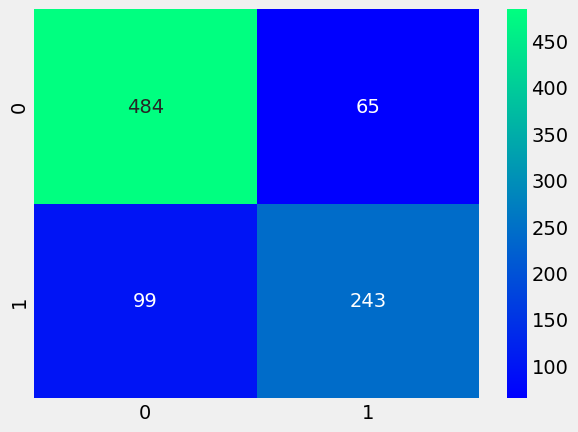

In [207]:
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.05)
result = cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,result), cmap='winter', annot=True, fmt='2.0f')
plt.show()

## Feature Importance

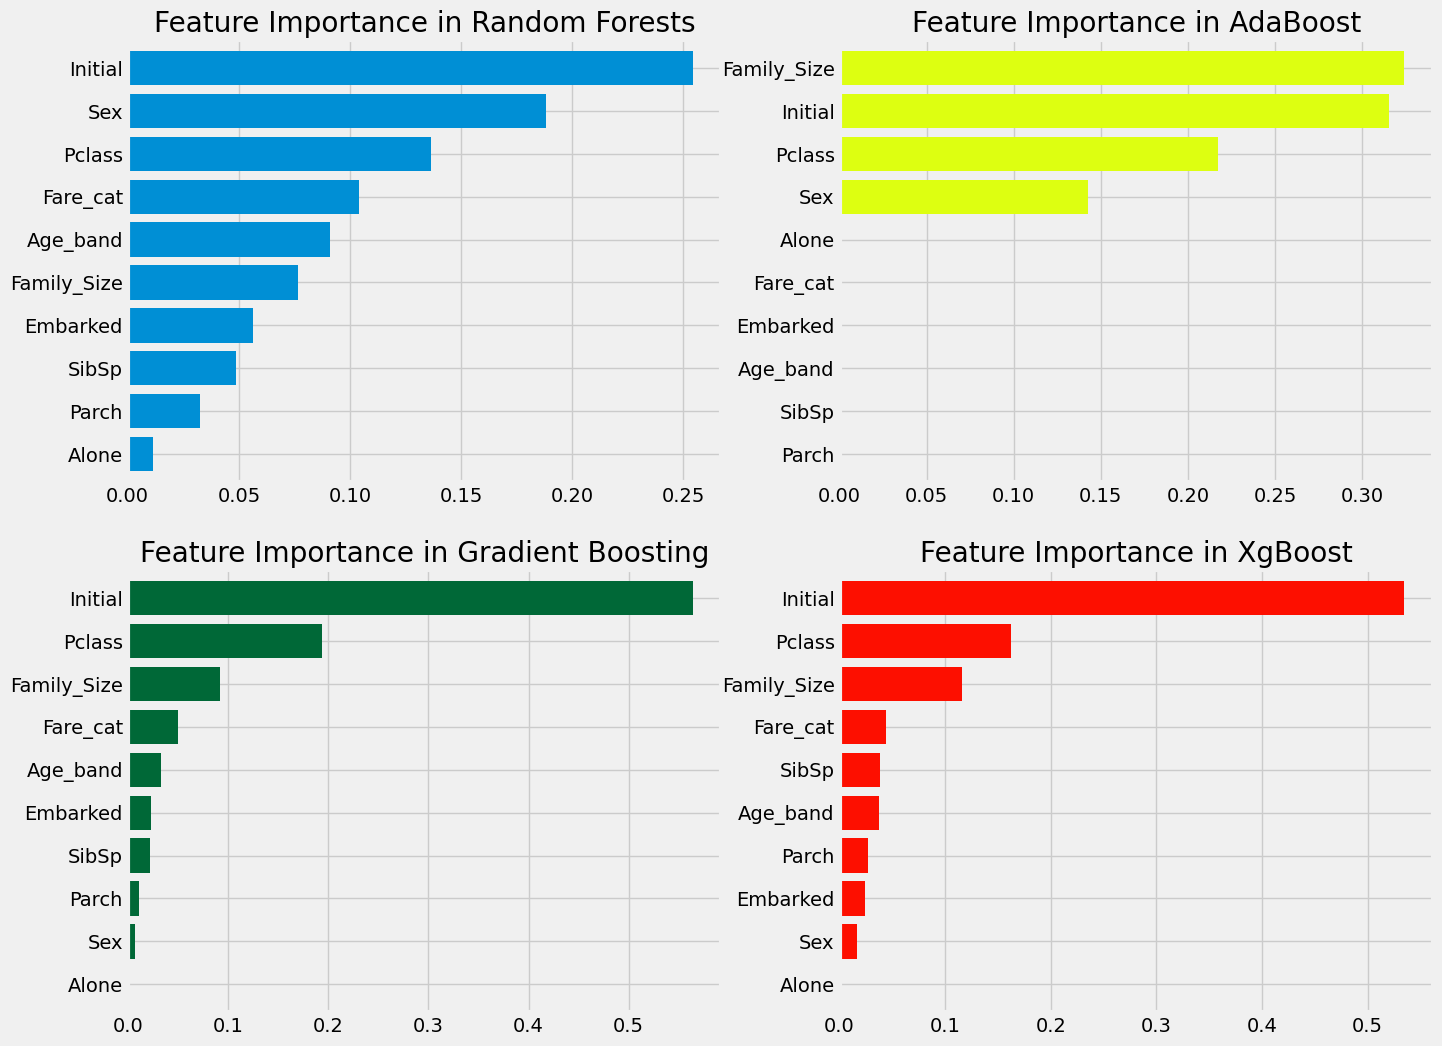

In [206]:
f, ax = plt.subplots(2,2,figsize=(15,12))
model = RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

< Observations >
1. Some of the common important features are Initial,Fare_cat,Pclass,Family_Size.

2. The Sex feature doesn't seem to give any importance, which is shocking as we had seen earlier that Sex combined with Pclass was giving a very good differentiating factor. Sex looks to be important only in RandomForests.

However, we can see the feature Initial, which is at the top in many classifiers.We had already seen the positive correlation between Sex and Initial, so they both refer to the gender.

3. Similarly the Pclass and Fare_cat refer to the status of the passengers and Family_Size with Alone,Parch and SibSp.